In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
# YOUR CODE HERE (OPTION) 

In [2]:
df = pd.read_csv('Airline_Delay_Cause.csv')
display(df)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.92,1.00,...,0.00,0.00,0.0,0.0,129.0,98.0,23.0,8.0,0.0,0.0
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,11.80,0.72,...,0.00,7.48,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,501.0
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.84,1.00,...,0.00,5.40,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,589.0
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,1.32,1.00,...,1.00,4.28,0.0,1.0,657.0,103.0,82.0,93.0,25.0,354.0
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,18.10,5.75,...,0.00,2.55,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,327.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101310,2017,1,WN,Southwest Airlines Co.,SNA,"Santa Ana, CA: John Wayne Airport-Orange County",1576.0,484.0,108.28,1.27,...,0.00,271.74,34.0,2.0,21762.0,4745.0,102.0,3468.0,0.0,13447.0
101311,2017,1,WN,Southwest Airlines Co.,STL,"St. Louis, MO: St Louis Lambert International",2914.0,522.0,147.05,12.26,...,2.35,249.41,75.0,1.0,25536.0,7203.0,707.0,3860.0,65.0,13701.0
101312,2017,1,WN,Southwest Airlines Co.,TPA,"Tampa, FL: Tampa International",2390.0,447.0,140.36,17.54,...,0.46,208.69,29.0,2.0,24203.0,6666.0,1817.0,3389.0,13.0,12318.0
101313,2017,1,WN,Southwest Airlines Co.,TUL,"Tulsa, OK: Tulsa International",404.0,74.0,26.29,0.28,...,0.00,42.22,6.0,0.0,2905.0,993.0,17.0,170.0,0.0,1725.0


In [3]:
df.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

## Xử lý và phân tích dữ liệu


### Cau hoi 2:

#### Thời gian nào trong năm thường xảy ra trễ chuyến bay? (tính từ 2017-2021 vì năm 2022 chỉ mới thống kê tới tháng 7).

#### Nếu thời gian trễ chuyến là khoang truoc thang 7 thì hãy vẽ biểu đồ năm 2022 để kiểm tra có đúng không.


In [4]:
data_2=df.loc[df['year']<2022]
data_2=data_2[['year','month','arr_flights','arr_del15']]
data_2=data_2.groupby(['year','month']).sum()
data_2
del_rates=[]
for i in range(len(data_2)):
    del_rates.append(data_2[i:i+1]['arr_del15'].values/data_2[i:i+1]['arr_flights'].values)

del_rated=pd.DataFrame(del_rates)
del_rated=del_rated.rename({0:'Rate'},axis=1)
month_year=[]
for i in range(2017,2022):
    for j in range(1,13):
        month_year.append([j,i])
month_year=np.array(month_year)
month_year[:,0]
del_rated.insert(0,'month',month_year[:,0])
del_rated.insert(0,'year',month_year[:,1])
max_rated=del_rated.groupby('year')['Rate'].max()


years=list(set(df['year']))
years.pop()
months=[]
rates=[]
d=[]

for i in range(5):
    d=del_rated.loc[del_rated['Rate']==max_rated[i:i+1].values[0]]
    months.append(d.values[0][1])
    rates.append(d.values[0][2])

for i in range(len(months)):
    months[i]=int(months[i])

d=pd.DataFrame(rates)
d.insert(0,'month',months)
d.insert(0,'year',years)
d=d.rename({0:'Rate'},axis=1)
print('Thang co tan suat chuyen bay bi hoan nhieu nhat theo tung nam:')
d

Thang co tan suat chuyen bay bi hoan nhieu nhat theo tung nam:


C:\Users\admin\AppData\Local\Temp\ipykernel_13596\2310218789.py:29: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  d=del_rated.loc[del_rated['Rate']==max_rated[i:i+1].values[0]]


,year,month,Rate
0,2017,6,0.224007
1,2018,7,0.225194
2,2019,6,0.240867
3,2020,2,0.147346
4,2021,7,0.245385


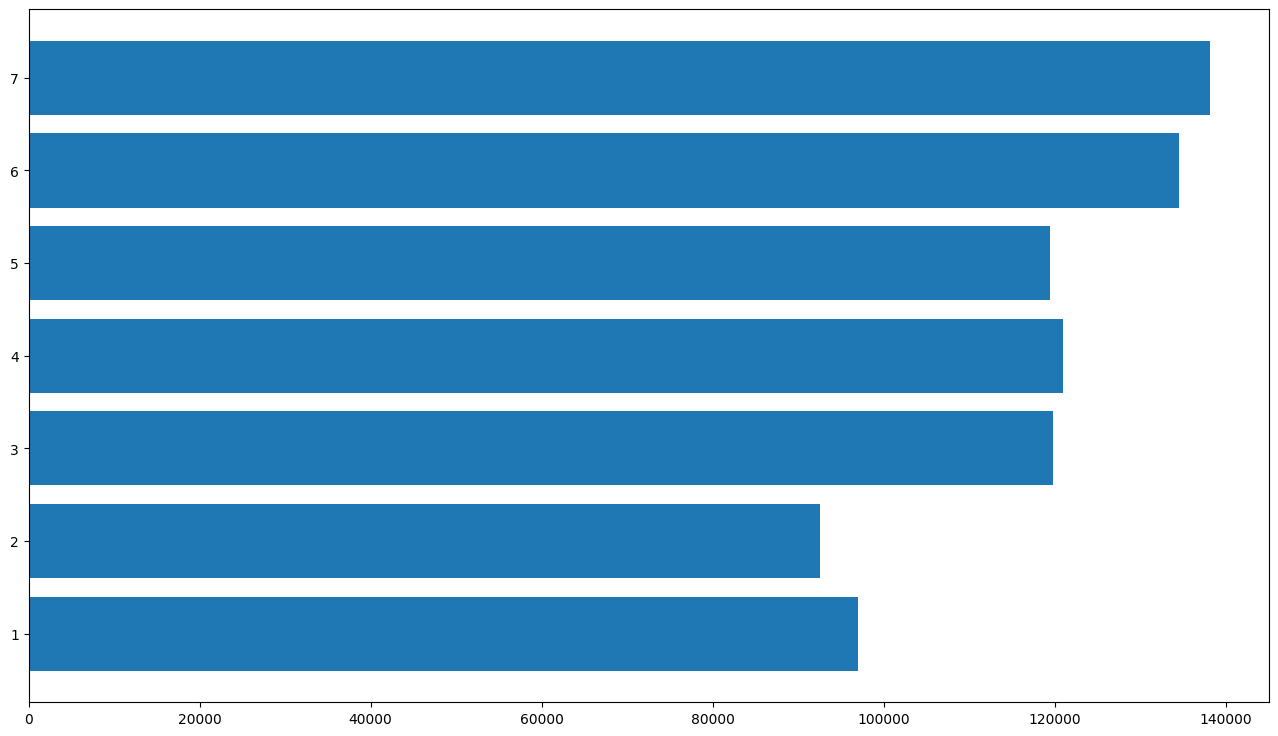

In [5]:
data_2=df.loc[df['year']==2022]

data_2=data_2[['year','month','arr_flights','arr_del15']]
months=list(set(data_2['month']))
data_2=data_2.groupby(['year','month']).sum()
data_2

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(months,data_2['arr_del15'].values)

# Show Plot
plt.show()


### Cau hoi 3: 

#### Ben canh nhung chuyen bay bi hoan thi co nhung chuyen bay bi huy va chuyen huong. Tinh tan suat nhung chuyen bay bi huy va chuyen huong. 

#### Phan tich ky hon ve tan suat qua cac nam.

#### Ve bieu do minh hoa de quan sat ky hon su thay doi cua nhung chuyen bay bi huy va chuyen huong.

In [6]:
data=copy.deepcopy(df)
sub_data=data[['year','arr_flights','arr_cancelled','arr_diverted']]
sub_data

,year,arr_flights,arr_cancelled,arr_diverted
0,2022,33.0,0.0,0.0
1,2022,78.0,0.0,0.0
2,2022,124.0,5.0,4.0
3,2022,67.0,0.0,1.0
4,2022,174.0,1.0,0.0
...,...,...,...,...
101310,2017,1576.0,34.0,2.0
101311,2017,2914.0,75.0,1.0
101312,2017,2390.0,29.0,2.0
101313,2017,404.0,6.0,0.0


In [7]:
sum_arr_flights=sub_data['arr_flights'].sum()
sum_arr_cancelled=sub_data['arr_cancelled'].sum()
sum_arr_diverted=sub_data['arr_diverted'].sum()
cancelled_rate=sum_arr_cancelled/sum_arr_flights
diverted_rate=sum_arr_diverted/sum_arr_flights
print(cancelled_rate)
print(diverted_rate)

0.02371531153150382
0.0023014443460033633


In [8]:
sub_data = sub_data.groupby('year').sum()
cancelled_rates=[]
diverted_rates=[]
for i in range(len(sub_data)):
    cancelled_rates.append(sub_data[i:i+1]['arr_cancelled'].values/sub_data[i:i+1]['arr_flights'].values)
    diverted_rates.append(sub_data[i:i+1]['arr_diverted'].values/sub_data[i:i+1]['arr_flights'].values)

cancelled_rated=pd.DataFrame(cancelled_rates)
cancelled_rated=cancelled_rated.rename({0:'Rate'},axis=1)
cancelled_rated = cancelled_rated.set_axis(list(set(data['year'])), axis=0, inplace=False)

diverted_rated=pd.DataFrame(diverted_rates)
diverted_rated=diverted_rated.rename({0:'Rate'},axis=1)
diverted_rated = diverted_rated.set_axis(list(set(data['year'])), axis=0, inplace=False)

print('Tan suat huy theo tung nam: ')
print(cancelled_rated)

print('\nTan suat chuyen huong theo tung nam: ')
print(diverted_rated)



Tan suat huy theo tung nam: 
          Rate
2017  0.014572
2018  0.013930
2019  0.018179
2020  0.059943
2021  0.017190
2022  0.029847

Tan suat chuyen huong theo tung nam: 
          Rate
2017  0.002208
2018  0.002422
2019  0.002544
2020  0.001652
2021  0.002355
2022  0.002480


C:\Users\admin\AppData\Local\Temp\ipykernel_13596\1971553139.py:10: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  cancelled_rated = cancelled_rated.set_axis(list(set(data['year'])), axis=0, inplace=False)
C:\Users\admin\AppData\Local\Temp\ipykernel_13596\1971553139.py:14: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  diverted_rated = diverted_rated.set_axis(list(set(data['year'])), axis=0, inplace=False)


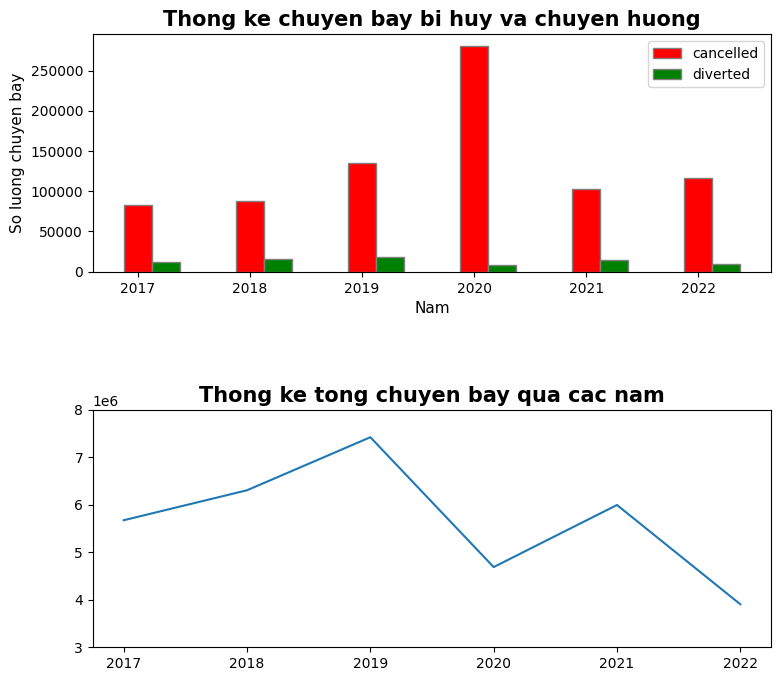

In [9]:
# set width of bar
barWidth = 0.25
list_year=['2017', '2018', '2019', '2020', '2021','2022']

figure, axis = plt.subplots(2, 1,figsize =(9, 8))
# set height of bar
cancelled=sub_data['arr_cancelled']
diverted=sub_data['arr_diverted'] 

# Set position of bar on X axis
br1 = list(set(data['year']))
br2 = [x + barWidth for x in br1]

# Make the plot
axis[0].bar(br1, cancelled, color ='r', width = barWidth, edgecolor ='grey', label ='cancelled')
axis[0].bar(br2, diverted, color ='g', width = barWidth, edgecolor ='grey', label ='diverted')

# Adding Xticks
axis[0].set_title('Thong ke chuyen bay bi huy va chuyen huong', fontweight ='bold', fontsize = 15)
axis[0].set_xlabel('Nam', fontsize = 11)
axis[0].set_ylabel('So luong chuyen bay', fontsize = 11)

axis[1].set_title('Thong ke tong chuyen bay qua cac nam', fontweight ='bold', fontsize = 15)
axis[1].plot(br1,sub_data['arr_flights'])
axis[1].set_ylim(3*10**6,8*10**6)
axis[0].legend()
figure.tight_layout(pad=5.0)

plt.show()

### Câu hỏi 4: 
#### Nguyên nhân nào chiếm phần lớn trong việc gây trễ chuyến bay?
#### Lợi ích khi trả lời: 
- Biết được thì các hãng bay có thể đầu tư nhiều hơn để cải thiện.
- Nếu dự đoán được các lý do trễ có thể xảy ra, hãng bay có thể sắp xếp/chuyển đổi lịch bay phù hợp để hạn chế việc bị trễ nhất, hoặc thông báo trước với khách hàng về khả năng thay đổi.

### Tiền xử lý và phân tích dữ liệu để trả lời câu hỏi

Để trả lời câu hỏi này, ta cần:
- Bước 1: Tính số lượng các chuyến bay bị trễ do các nguyên nhân khác nhau theo từng năm, lưu vào data_delay trong đó index là year.
- Bước 2: Từ kết quả trên vẽ biểu đồ pie để xem mỗi năm thì những nguyên nhân nào chiếm phần lớn gây nên việc trễ chuyến bay.

Code bước 1:

In [10]:
# data_delay=df.loc[df['year']!=2022]
data_delay = df.groupby('year')[['carrier_ct','weather_ct','nas_ct','security_ct','late_aircraft_ct']].sum()
data_delay


,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct
year,,,,,
2017,285058.62,28580.50,330589.89,1801.53,383442.51
2018,329525.62,38951.90,387162.95,2270.54,421521.01
2019,387853.40,46302.53,439490.62,2642.27,512965.20
2020,156852.77,19647.38,144325.07,1543.31,109553.33
2021,394017.93,44230.01,247044.20,4701.70,320339.14
2022,313797.29,29379.05,194779.23,2566.91,282139.02


Code bước 2:

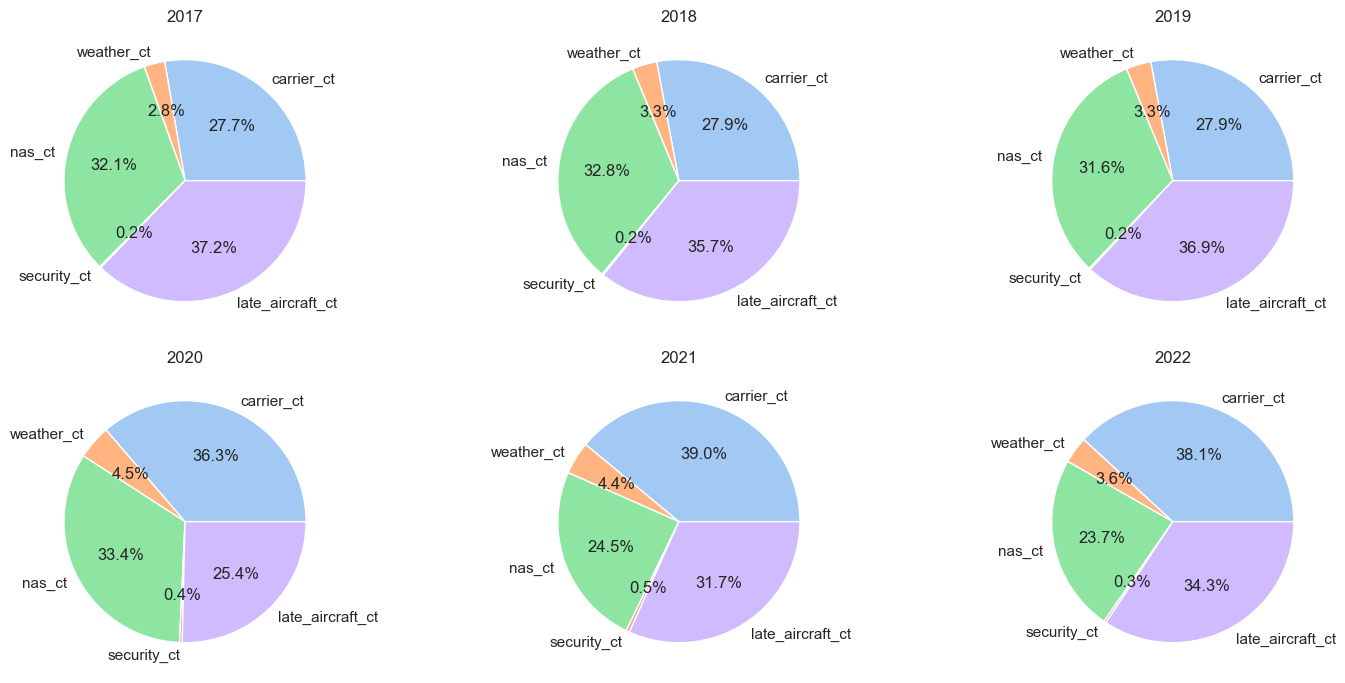

In [11]:
sns.set_theme()
colors = sns.color_palette('pastel')[0:5]
fig, ax = plt.subplots(2,3)
fig.set_figwidth(15)
fig.set_figheight(7)
idx = 0
for i in range(2):
    for j in range(3):
        ax[i,j].pie(data_delay.iloc[idx],labels = data_delay.iloc[idx].index,colors = colors, autopct='%.1f%%')
        ax[i,j].set_title(data_delay.index[idx])
        idx+=1
plt.tight_layout()
plt.show()

Quan sát các biểu đồ trên, ta nhận thấy rằng có ba nguyên nhân chủ yếu khiến cho các chuyến bay bị trễ là:
- carrier_ct: Số chuyến bay bị hoãn vì hãng hàng không.
- nas_ct: Số chuyến bay bị hoãn vì hệ thống hàng không quốc gia.
- late_aircraft_ct: Số chuyến bay bị hoãn do một chuyến khác trên cùng máy bay cũng bị hoãn.

Tiếp theo, để tìm hiều rõ hơn, ta sẽ xem xét số lượng các chuyến bay bị trễ biến động như thế nào qua các năm bởi ba nguyên nhân chủ yếu trên.
Để làm rõ ta cần: 
- Bước 1: Ta lọc ra số lượng các chuyến bay bị trễ bởi 3 nguyên nhân(hãng hàng không, hệ thống hàng không quốc gia, một chuyến khác trên cùng máy bay cũng bị hoãn) và tổng chuyến bay theo các năm.
- Bước 2: Từ kết quả trên vẽ đồ thị dạng line thể hiện sự thay đổi qua các năm với trục tung là "Số lượng chuyến bay bị trễ" và trục hoành là "Năm".Thêm vào đó dùng marker la điểm tròn để cho thấy các điểm dữ liệu.

Code bước 1:

In [12]:
top3_delay = data_delay[['carrier_ct','nas_ct', 'late_aircraft_ct']].reset_index()
top3_delay['Total'] = df.groupby('year')['arr_flights'].sum().values
top3_delay

,year,carrier_ct,nas_ct,late_aircraft_ct,Total
0,2017,285058.62,330589.89,383442.51,5674621.0
1,2018,329525.62,387162.95,421521.01,6305694.0
2,2019,387853.40,439490.62,512965.20,7422037.0
3,2020,156852.77,144325.07,109553.33,4688354.0
4,2021,394017.93,247044.20,320339.14,5995397.0
5,2022,313797.29,194779.23,282139.02,3906029.0


Code bước 2:

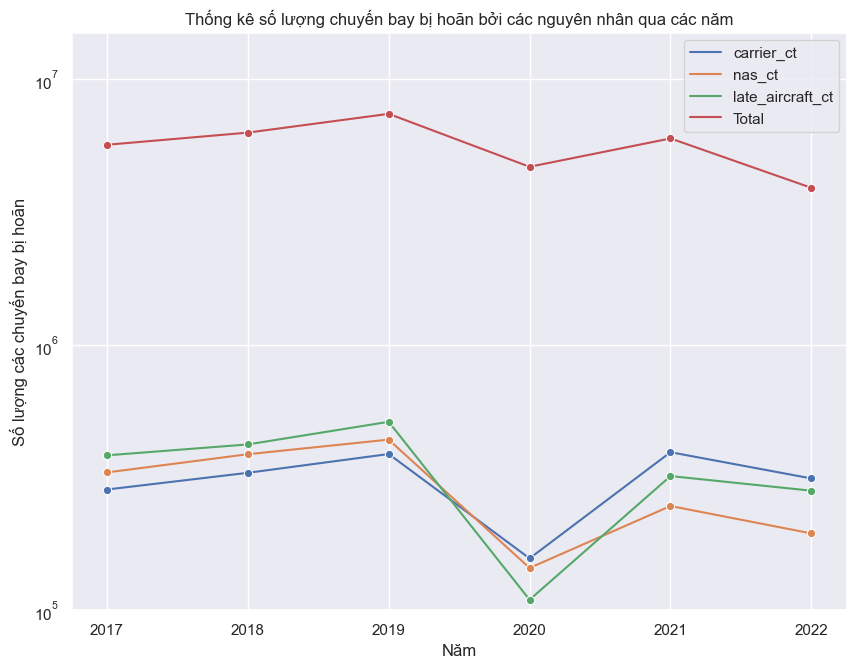

In [13]:
fig,ax = plt.subplots(figsize = (10,7.5))
g = sns.lineplot(x='year', y ='value', hue='variable', marker='o',
             data=pd.melt(top3_delay, ['year']));
#sns.lineplot(data = total, x = 'year', y = total.values, marker = 'o')
plt.xlabel('Năm')
plt.ylabel('Số lượng các chuyến bay bị hoãn')
plt.title('Thống kê số lượng chuyến bay bị hoãn bởi các nguyên nhân qua các năm')
plt.legend();
#plt.ticklabel_format(style = 'plain')
plt.ylim(100000,15000000)
plt.yscale('symlog')

Nhận xét: Số lượng các chuyến bay bị hoãn với 3 nguyên nhân cốt yếu có sự biến động thất thường từ 2017 - 2022
- Tăng mạnh từ 2017 - 2019, cuộc sống ngày càng hiện đại nên nhu cầu di chuyển bằng đường hàng không vừa an toàn và nhanh chóng tăng nhanh cho nên các chuyến bay bị hoãn cũng hiển nhiên tăng cao. Số lượng chuyến bay bị hoãn vì ba nguyên nhân tăng đều trong đó số lượng bị hoãn vì một chuyến khác trên cùng một máy bay cũng bị hoãn là cao nhất, ngược lại nguyên nhân vì hãng hàng không thì thấp nhất.
- Giảm mạnh vào năm 2020, đây là thời điểm thế giới có nhiều biến động đặt biệt là covid-19 chính vì vậy việc di chuyển bằng đường hàng không bị hạn chế dẫn đến các chuyến bay bị hoãn lại cũng theo đó không nhiều. Trong đó số lượng bị hoãn do một chuyến khác trên cùng một máy bay bị hoãn đột ngột giảm mạnh xuống mức thấp nhất trong 3 nguyên nhân, còn nguyên nhân vì hãng hàng không có giảm nhưng lại là nguyên nhân chủ yếu gây nên việc hoãn chuyến bay trong năm 2020.
- Tăng nhanh vào năm 2021, các chuyến bay đã được tăng lên song song với đó là việc các chuyến bay trì hoãn cũng tăng lên lúc này nguyên nhân chủ yếu dẫn đến hoãn các chuyến bay vẫn là do từ hãng hàng không, tiếp đến là vì có một chuyến khác trên cùng máy bay bị hoãn và cuối cùng là hệ thống hàng không quốc gia.
- Đến năm 2022 số lượng chuyến bay thấp bởi vì đây mới chỉ là thống kê tới tháng 7/2022 nên ta vẫn chưa thể có những khẳng định chính xác, tuy vậy nếu chỉ tính tới tháng 7 thì số chuyến bay bị hoãn lại có nguyên nhân lớn vẫn đến từ hãng hàng không và thấp hơn đối với hai nguyên nhân còn lại.
- Ta thấy rằng trong những năm gần đây số lượng các chuyến bay bị hoãn do hãng hàng không là chủ yếu, chính vì vậy các hãng hàng không cần chú ý hơn và có những biện pháp phù hợp để cải thiện tình trạng này và nâng cao chất lượng dịch vụ hàng không.